In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\NareshIT\DataScience\DataFiles\Visadataset - Visadataset.csv")
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [4]:
visa_df.select_dtypes(exclude="object").head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


In [5]:
c = visa_df.select_dtypes(exclude="object").columns
for i in c:
    print(i)

no_of_employees
yr_of_estab
prevailing_wage


**prevailing_wage**

- len
- max
- min
- mean
- median
- std
- 75%
- 50%
- 25%

**count/len**

In [6]:
len(visa_df.prevailing_wage)

25480

 **max**

In [7]:
max(visa_df.prevailing_wage) # python keyword

319210.27

In [8]:
visa_df.prevailing_wage.max() # pandas

319210.27

In [9]:
np.max(visa_df.prevailing_wage) # numpy

319210.27

**min**

In [10]:
min(visa_df.prevailing_wage)

2.1367

In [11]:
visa_df.prevailing_wage.min()

2.1367

In [12]:
np.min(visa_df.prevailing_wage)

2.1367

**mean**

In [13]:
visa_df.prevailing_wage.mean()

74455.81459209183

In [14]:
np.mean(visa_df.prevailing_wage)

74455.81459209183

**median**

In [15]:
visa_df.prevailing_wage.median()

70308.20999999999

In [16]:
np.median(visa_df.prevailing_wage)

70308.20999999999

**Standard devians**

In [17]:
visa_df.prevailing_wage.std()

52815.94232687357

In [18]:
np.std(visa_df.prevailing_wage)

52814.90589711402

In [19]:
wage_lst = []

wage_cnt = round(len(visa_df.prevailing_wage),2)
wage_min = round(visa_df.prevailing_wage.min(),2)
wage_max = round(visa_df.prevailing_wage.max(),2) 
wage_mean = round(visa_df.prevailing_wage.mean(),2)
wage_median = round(visa_df.prevailing_wage.median(),2)
wage_std = round(visa_df.prevailing_wage.std(),2)

wage_lst = [wage_cnt,wage_min,wage_max,wage_mean,wage_median,wage_std]
index = ['count','min','max','mean','median','std']

In [20]:
df = pd.DataFrame(data=wage_lst,index=index, columns=['prevailing wage'])
df

,prevailing wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94


**Percentile-Quantile**

- percentile:

   - np.percentile() -> it takes 2 parameters

                          - data : a

                          - percentile: q the value varies from 0 to 100
  

- quantile:

   - np.quantile() -> it takes 2 parameters

                          - data : a

                          - percentile: q the value varies from 0 to 1

**25p-50p-75p**

In [21]:
wage_25p = round(np.percentile(visa_df.prevailing_wage, 25),2)
wage_50p = round(np.percentile(visa_df.prevailing_wage, 50),2)
wage_75p = round(np.percentile(visa_df.prevailing_wage, 75),2)

print(f"25p data is {wage_25p}, 50p data is {wage_50p}, 75p data is {wage_75p} ")

25p data is 34015.48, 50p data is 70308.21, 75p data is 107735.51 


In [22]:
wage_25q = round(np.quantile(visa_df.prevailing_wage, 0.25),2)
wage_50q = round(np.quantile(visa_df.prevailing_wage, 0.50),2)
wage_75q = round(np.quantile(visa_df.prevailing_wage, 0.75),2)

print(f"25q data is {wage_25q}, 50q data is {wage_50q}, 75q data is {wage_75q} ")

25q data is 34015.48, 50q data is 70308.21, 75q data is 107735.51 


**Understand the percentile**

- definition of 25 percentile

  - it means 25% of employees has salary less than 34015, i.e total emp = 25480
  - 25% of empl = 5370, i.e. 6370 employees salary is lessthan 34015

In [23]:
cnt25 = visa_df.prevailing_wage < wage_25q
len(visa_df[cnt25])

6370

In [24]:
cnt50 = visa_df.prevailing_wage < wage_50p	
len(visa_df[cnt50])

12740

In [25]:
cnt75 = visa_df.prevailing_wage < wage_75p
len(visa_df[cnt75])

19110

**Emperical rule 68-95-99.7**

<img src="https://ucarecdn.com/ec7964b6-6cb1-4745-8a79-73e52e0677bc/" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" alt="Empirical rule · Hyperskill" jsname="kn3ccd" aria-hidden="false">

- First calculate mean value

- second calculate std value

- con1 : mean-1*std

- con2 : mean+1*std

- if we apply above conditions on wage data, the output count should be equal to 68p data

- i.e. 68% of total employees : 17326

In [26]:
v1 = wage_mean-1*wage_std
v2 = wage_mean+1*wage_std
v1,v2
cond1 = visa_df.prevailing_wage > v1
cond2 = visa_df.prevailing_wage < v2
d = visa_df[cond1 & cond2]
len(d)

17171

In [27]:
u1 = wage_mean-2*wage_std
u2 = wage_mean+2*wage_std
u1,u2
con1 = visa_df.prevailing_wage > u1
con2 = visa_df.prevailing_wage < u2
d = visa_df[con1 & con2]
len(d), 95*25480/100

(24582, 24206.0)

In [28]:
w1 = wage_mean-3*wage_std
w2 = wage_mean+3*wage_std
w1,w2
con1 = visa_df.prevailing_wage > w1
con2 = visa_df.prevailing_wage < w2
d = visa_df[con1 & con2]
len(d), 99.7*25480/100

(25186, 25403.56)

In [30]:
wage_cnt = round(len(visa_df.prevailing_wage),2)
wage_min = round(visa_df.prevailing_wage.min(),2)
wage_max = round(visa_df.prevailing_wage.max(),2) 
wage_mean = round(visa_df.prevailing_wage.mean(),2)
wage_median = round(visa_df.prevailing_wage.median(),2)
wage_std = round(visa_df.prevailing_wage.std(),2)

wage_25p = round(np.percentile(visa_df.prevailing_wage, 25),2)
wage_50p = round(np.percentile(visa_df.prevailing_wage, 50),2)
wage_75p = round(np.percentile(visa_df.prevailing_wage, 75),2)

wage_lst = [wage_cnt,wage_min,wage_max,wage_mean,wage_median,wage_std,wage_25p,wage_50p,wage_75p]
index = ['count','min','max','mean','median','std','25%','50%','75%']
pd.DataFrame(data=wage_lst,index=index,columns=['prevailing wage']) 

,prevailing wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


**no_of_employees**

In [31]:
visa_df.no_of_employees

0        14513
1         2412
2        44444
3           98
4         1082
         ...  
25475     2601
25476     3274
25477     1121
25478     1918
25479     3195
Name: no_of_employees, Length: 25480, dtype: int64

In [90]:
# len
emp_cnt = round(len(visa_df.no_of_employees),2)
emp_min = round(visa_df.no_of_employees.min()
emp_max = round(visa_df.no_of_employees.max()
emp_mean = round(visa_df.no_of_employees.mean()
emp_median = round(visa_df.no_of_employees.median()
emp_std = round(visa_df.no_of_employees.std()

emp_25p = visa_df.no_of_employees

In [34]:
col = list(visa_df.select_dtypes(exclude='object').columns)
l1 = []
for i in col:
    cnt = round(len(visa_df[i]),2)
    mini = round(visa_df[i].min(),2)
    maxi = round(visa_df[i].max(),2)
    mean = round(visa_df[i].mean(),2)
    std = round(visa_df[i].std(),2)
    p25 = round(np.percentile(visa_df[i], 25),2)
    p50 = round(np.percentile(visa_df[i], 50),2)
    p75 = round(np.percentile(visa_df[i], 75),2)
    l1.append([cnt,mini,maxi,mean,std,p25,p50,p75])
    
    #pd.DataFrame(data=lst, index=index,columns=[i])

l1
index = ['count','min','max','mean','std','25%','50%','75%']
pd.DataFrame(l1)
pd.DataFrame(l1, columns=index, index = col).T

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
min,-26.00,1800.00,2.14
max,602069.00,2016.00,319210.27
mean,5667.04,1979.41,74455.81
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


**Describe**

In [33]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Histogram**

- We can get histogram from matplotlib

- We can get histogram from seaborn

- plt.hist

- Histogram will give 3 outputs

    - frequency : in each interval how many observations are there
    - interval
    - number of intervals

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

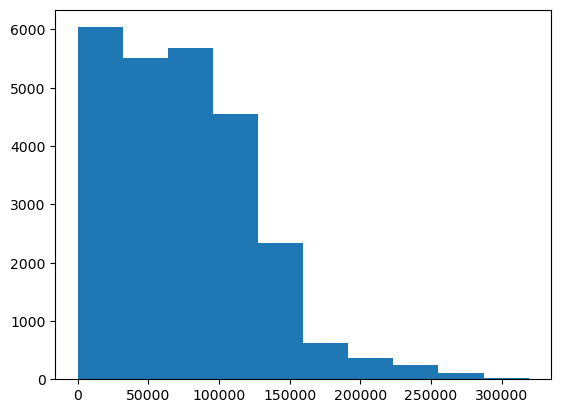

In [40]:
plt.hist(visa_df['prevailing_wage'])

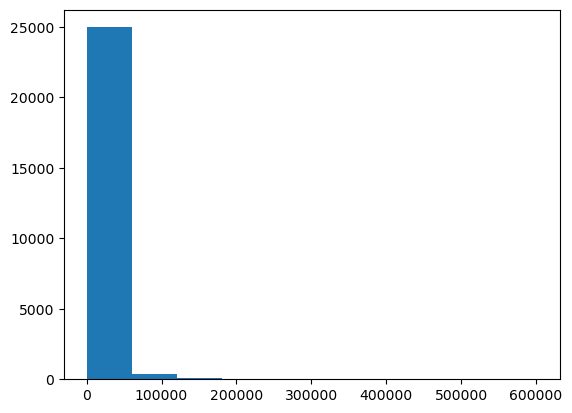

In [38]:
plt.hist(visa_df['no_of_employees'])
plt.show()

(array([  164.,   341.,   522.,   705.,   601.,   836.,   977.,  1818.,
         5424., 14092.]),
 array([1800. , 1821.6, 1843.2, 1864.8, 1886.4, 1908. , 1929.6, 1951.2,
        1972.8, 1994.4, 2016. ]),
 <BarContainer object of 10 artists>)

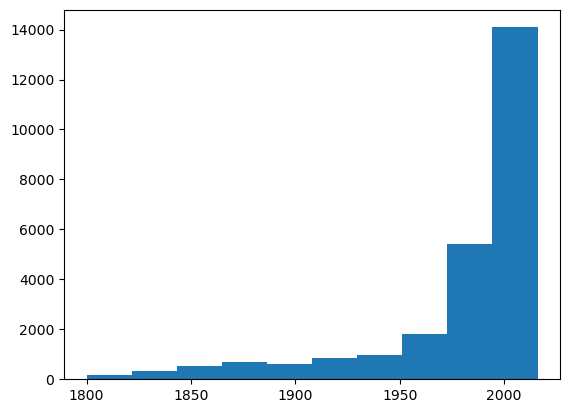

In [39]:
plt.hist(visa_df['yr_of_estab'])

**Check point -1**

In [43]:
con1 = visa_df['prevailing_wage'] >= 2.13670000e+00 
con2 = visa_df['prevailing_wage'] < 3.19229500e+04
len(visa_df[con1 & con2])

6038

**bins**

<BarContainer object of 100 artists>


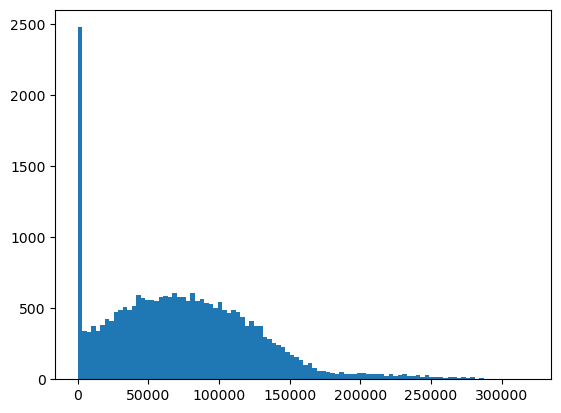

In [45]:
f,i,n = plt.hist(visa_df['prevailing_wage'], bins=100)
print(n)

Text(0, 0.5, 'count')

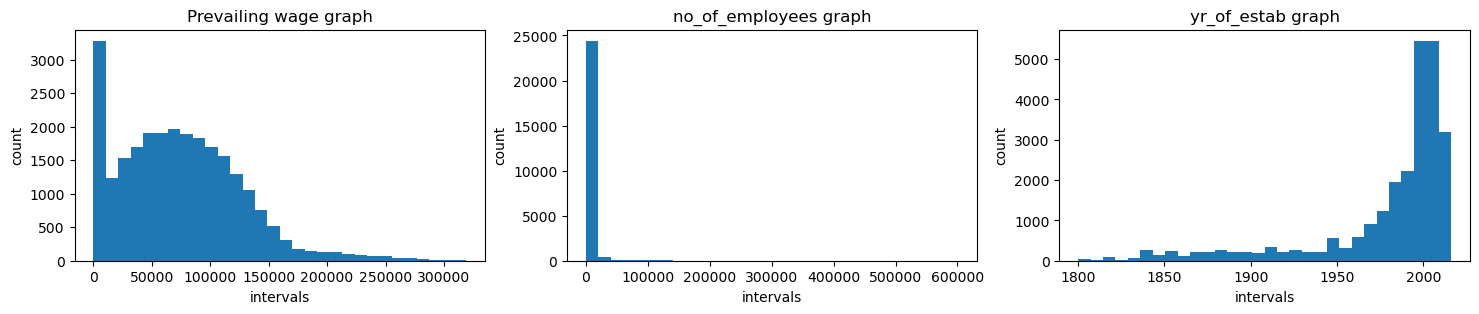

In [54]:
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'], bins=30)
plt.title("Prevailing wage graph")
plt.xlabel("intervals")
plt.ylabel("count")

plt.subplot(1,3,2)
plt.hist(visa_df['no_of_employees'], bins=30)
plt.title("no_of_employees graph")
plt.xlabel("intervals")
plt.ylabel("count")

plt.subplot(1,3,3)
plt.hist(visa_df['yr_of_estab'], bins=30)
plt.title("yr_of_estab graph")
plt.xlabel("intervals")
plt.ylabel("count")

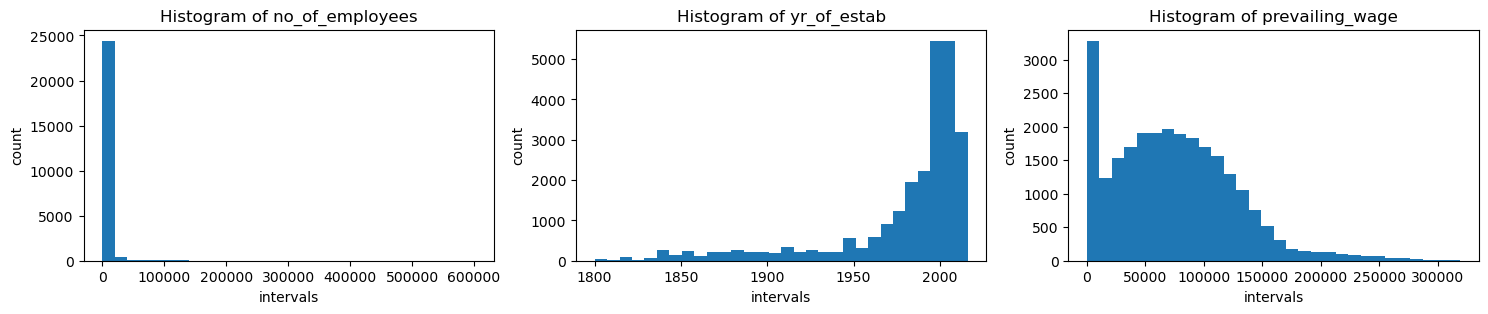

In [61]:
plt.figure(figsize=(18,3))
cols = visa_df.select_dtypes(exclude='object').columns
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    plt.hist(visa_df[cols[i]], bins=30)
    plt.title(f"Histogram of {cols[i]}")
    plt.xlabel("intervals")
    plt.ylabel("count")

**Histogram using seaborn**

- histplot :histogram
- distplot : distribution

- to avoid warnings: import warnings

<Axes: xlabel='yr_of_estab', ylabel='Count'>

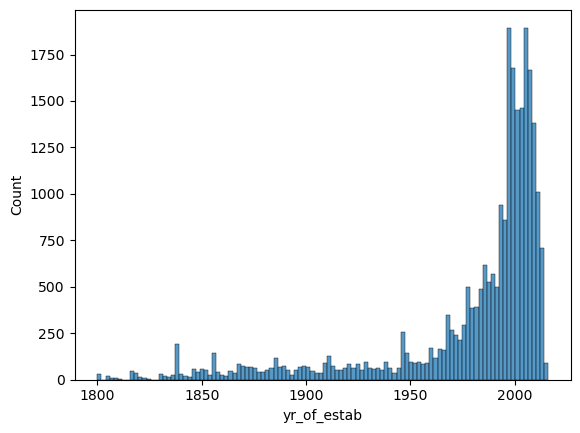

In [66]:
import warnings
warnings.filterwarnings("ignore")
sns.histplot(visa_df['yr_of_estab'])

<Axes: xlabel='yr_of_estab', ylabel='Density'>

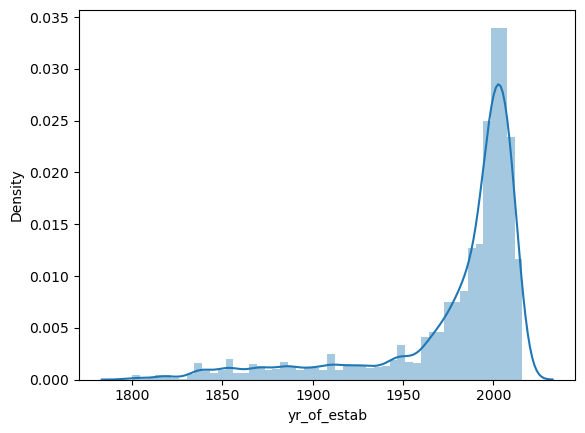

In [67]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(visa_df['yr_of_estab'])

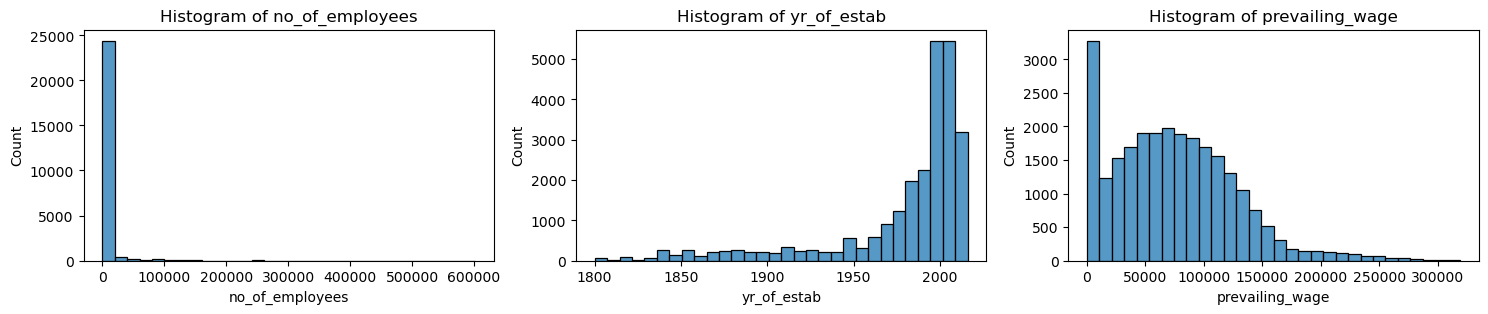

In [70]:
plt.figure(figsize=(18,3))
cols = visa_df.select_dtypes(exclude='object').columns
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    sns.histplot(visa_df[cols[i]], bins=30)
    plt.title(f"Histogram of {cols[i]}")